# Predicting Sleep Disorders


### 1. Data Loading & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# Display column names and their data types
print("\nColumn names and data types:")
display(df.info())


Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 3

None

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
# Generate descriptive statistics for numerical columns
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Impute missing values in the 'Sleep Disorder' column using a suitable technique based on relationships with other features.

Analyze the relationships between 'Sleep Disorder' and other relevant columns (e.g., 'BMI Category', 'Age', 'Occupation', 'Stress Level') to identify potential patterns.


In [ ]:
# Examine unique values and their counts in 'Sleep Disorder'
print("Sleep Disorder value counts:\n", df['Sleep Disorder'].value_counts(dropna=False))

# Analyze relationship b/w 'Sleep Disorder' and 'BMI Category'
print("\nSleep Disorder distribution by BMI Category:\n", df.groupby('BMI Category')['Sleep Disorder'].value_counts(dropna=False))

# Analyze relationship b/w 'Sleep Disorder' and 'Occupation'
print("\nSleep Disorder distribution by Occupation:\n", df.groupby('Occupation')['Sleep Disorder'].value_counts(dropna=False))

# Analyze relationship b/w 'Sleep Disorder' and 'Stress Level'
print("\nSleep Disorder distribution by Stress Level:\n", df.groupby('Stress Level')['Sleep Disorder'].value_counts(dropna=False))

Sleep Disorder value counts:
 Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Sleep Disorder distribution by BMI Category:
 BMI Category   Sleep Disorder
Normal         NaN               183
               Insomnia            7
               Sleep Apnea         5
Normal Weight  NaN                17
               Insomnia            2
               Sleep Apnea         2
Obese          Sleep Apnea         6
               Insomnia            4
Overweight     Sleep Apnea        65
               Insomnia           64
               NaN                19
Name: count, dtype: int64

Sleep Disorder distribution by Occupation:
 Occupation            Sleep Disorder
Accountant            NaN               30
                      Insomnia           7
Doctor                NaN               64
                      Sleep Apnea        4
                      Insomnia           3
Engineer              NaN               57
                      

Visualize the relationships b/w 'Sleep Disorder' and 'BMI Category', 'Occupation', and 'Stress Level' using count plots to better understand the distributions.



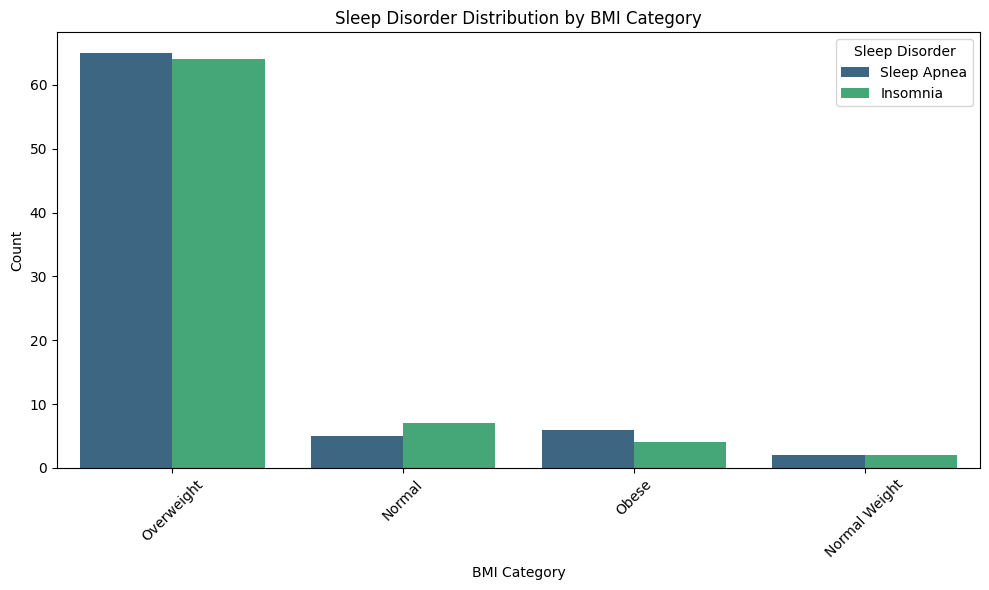

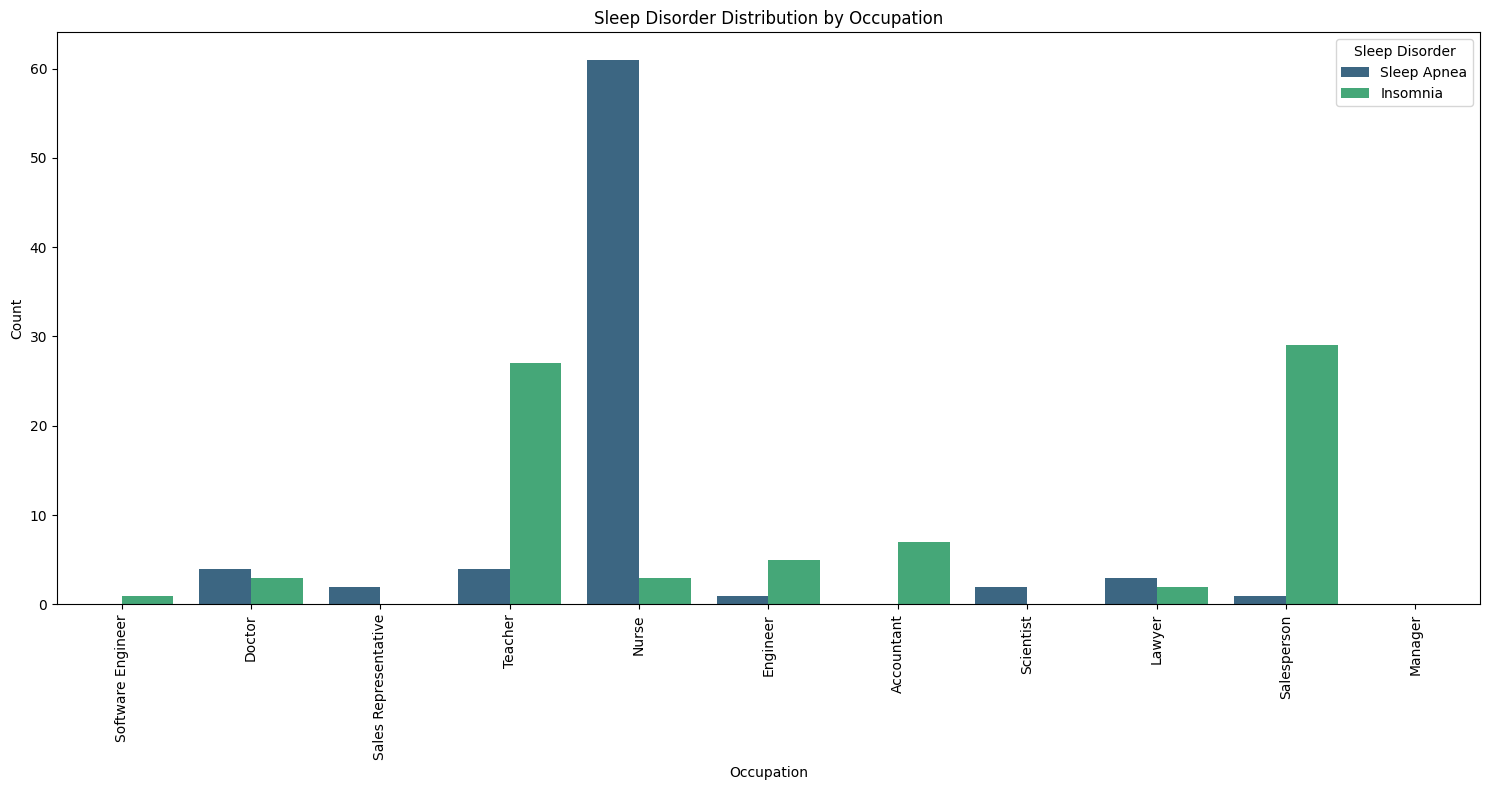

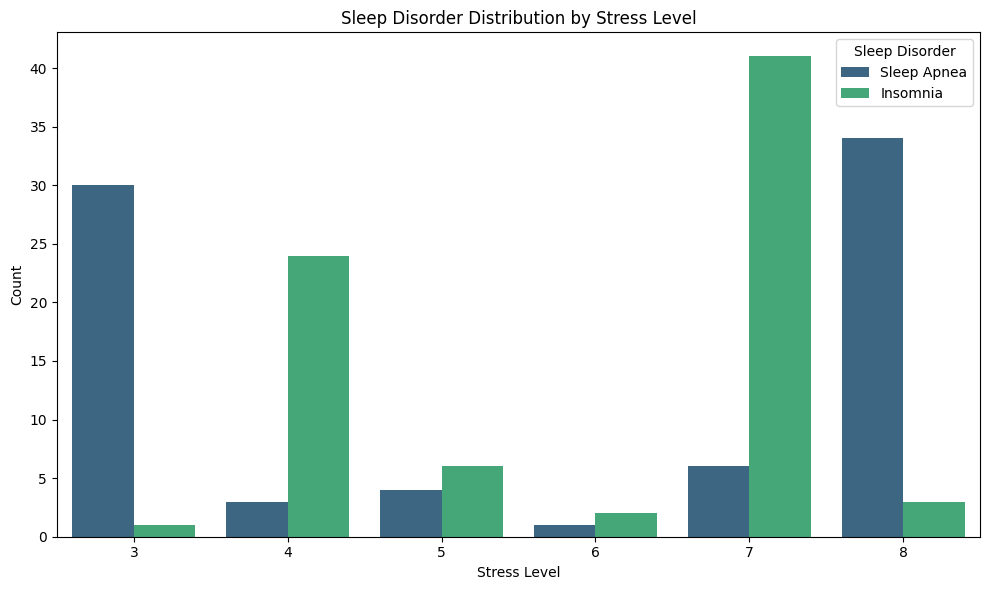

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize relationship b/w 'Sleep Disorder' and 'BMI Category'
plt.figure(figsize=(10, 6))           # Set the figure size for the plot
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='viridis')   # Create countplot showing distribution of 'Sleep Disorder' with 'BMI Category', data=df- dataframe, x-axis = BMI Category, hue = Sleep Disorder- separate bars by SD variable, palette is the color scheme assigned
plt.title('Sleep Disorder Distribution by BMI Category')      # Set the title of the plot
plt.xlabel('BMI Category')                                    # Label the x-axis
plt.ylabel('Count')                                           # Label the y-axis
plt.xticks(rotation=45)                                       # Rotate x-axis labels for better readability
plt.legend(title='Sleep Disorder')                            # Add a legend with a custom title
plt.tight_layout()                                            # Adjust layout to prevent overlap of labels
plt.show()                                                    # Display the plot

# Visualize relationship b/w 'Sleep Disorder' and 'Occupation'
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder', palette='viridis')
plt.title('Sleep Disorder Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

# Visualize relationship between 'Sleep Disorder' and 'Stress Level'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Sleep Disorder', palette='viridis')
plt.title('Sleep Disorder Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

Implement imputation strategy by grouping the dataframe by 'BMI Category', 'Occupation', and 'Stress Level', calculating the mode of 'Sleep Disorder' for each group, and using these modes to fill the missing values.



In [ ]:
# Define a function to calculate the mode of a Series, handling potential empty groups
def impute_mode(x):
    mode = x.mode()          # Calculate the mode
    if not mode.empty:       # Check if the mode is not empty
        return mode[0]       # Return the first mode value
    return None              # If the mode is empty, return None

# Calculate the group-wise mode for 'Sleep Disorder'
group_modes = df.groupby(['BMI Category', 'Occupation', 'Stress Level'])['Sleep Disorder'].transform(impute_mode)

# Fill missing values in the original 'Sleep Disorder' column using the calculated group-wise modes
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(group_modes)

df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Missing values in 'Sleep Disorder' have been partially imputed using group-wise modes.

The next logical step is to check the remaining missing values and, apply a simpler imputation strategy for those that could not be imputed by the group-wise mode. In this case, I will use the overall mode of the 'Sleep Disorder' column to fill the remaining 33 missing values.



In [ ]:
# Calculate the overall mode of the 'Sleep Disorder' column
overall_mode = df['Sleep Disorder'].mode()[0]

# Fill any remaining missing values with the overall mode
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(overall_mode)

df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### 2. Exploratory Data Analysis (EDA)

### 2.1. Understand Feature Distribution & Relationships with Sleep Disorders.

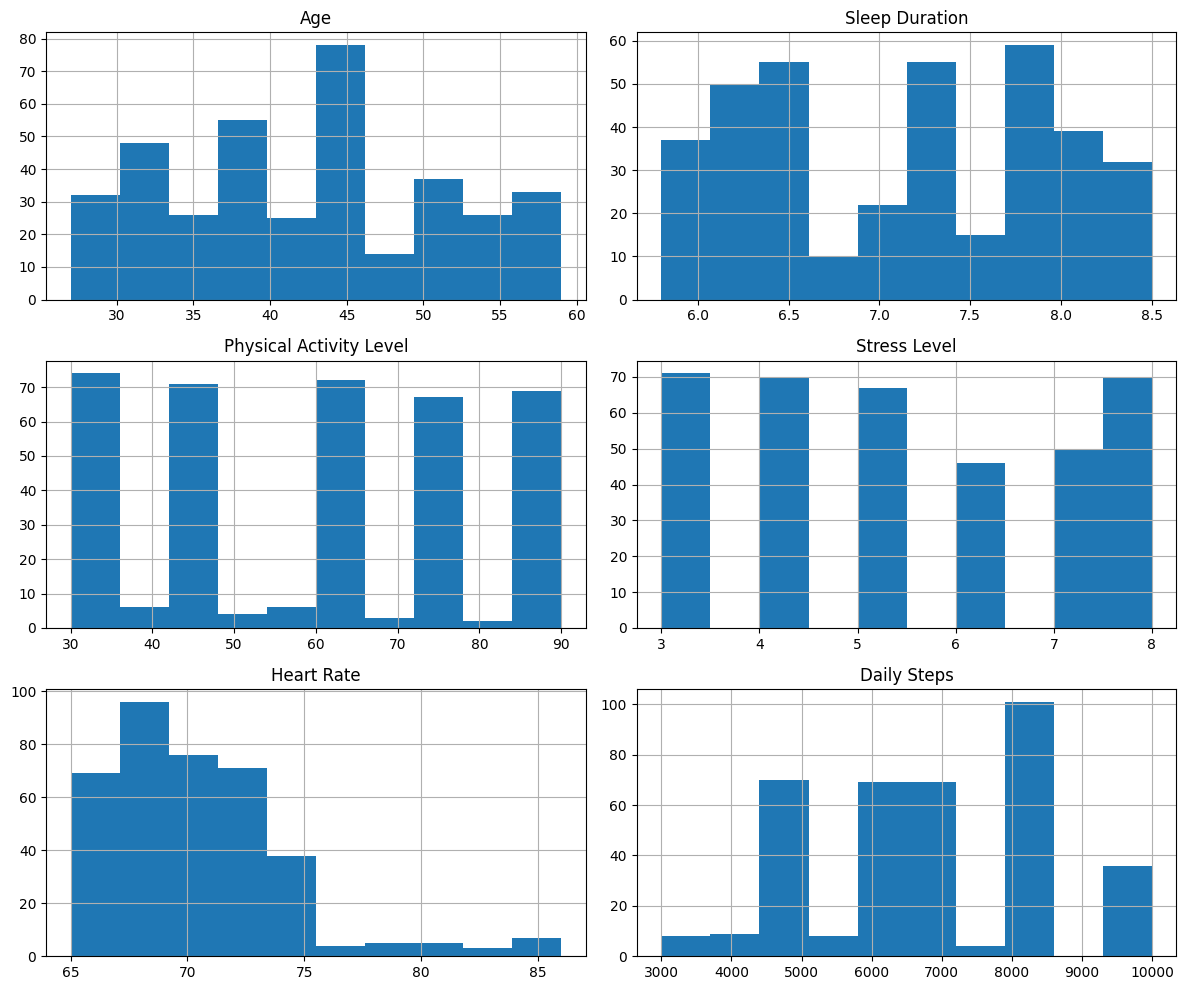

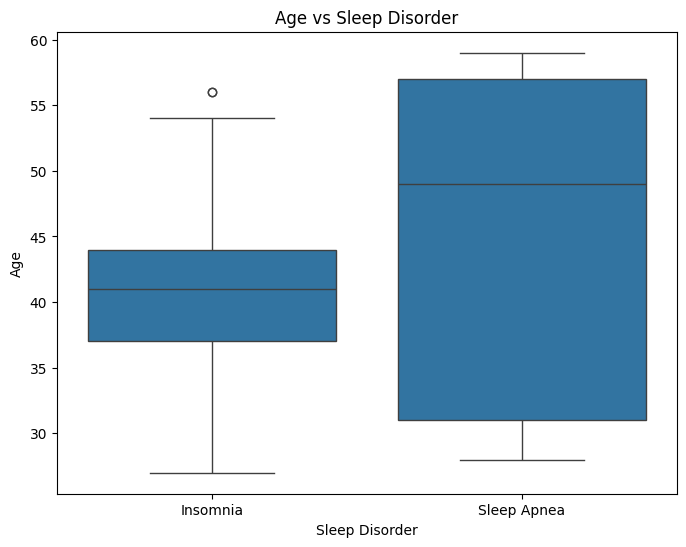

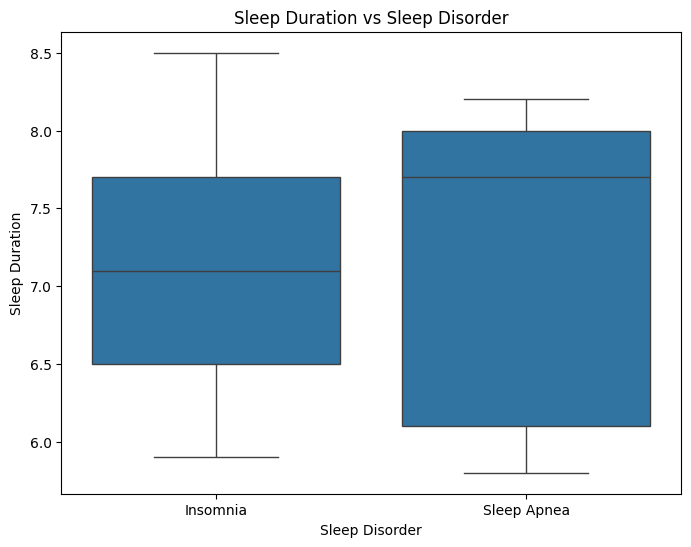

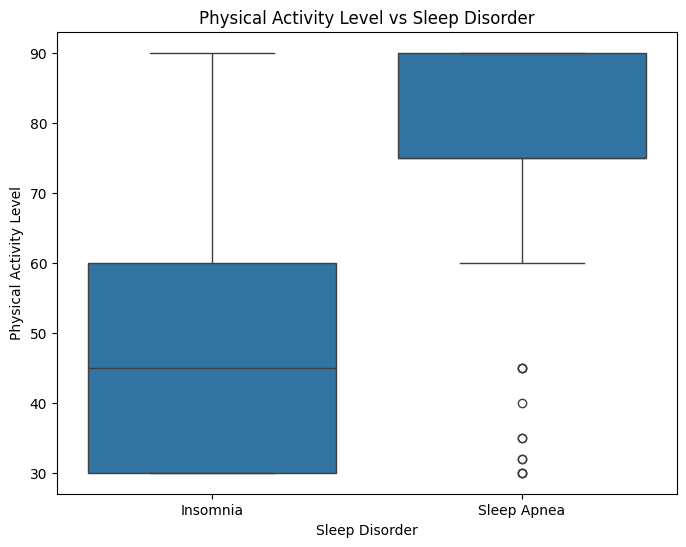

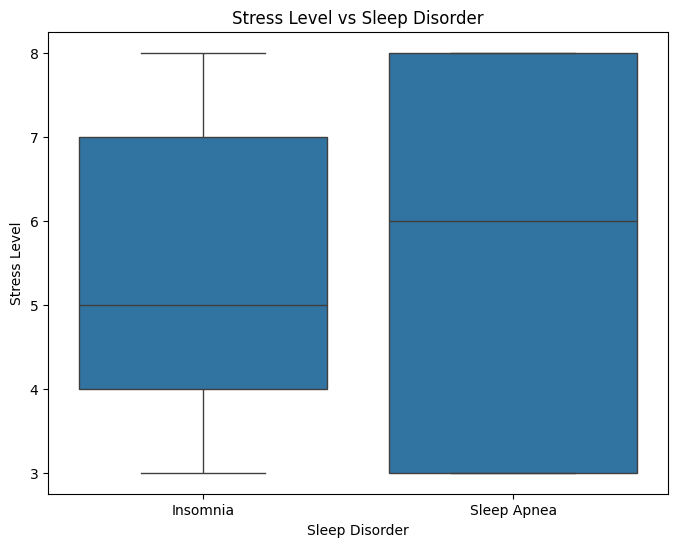

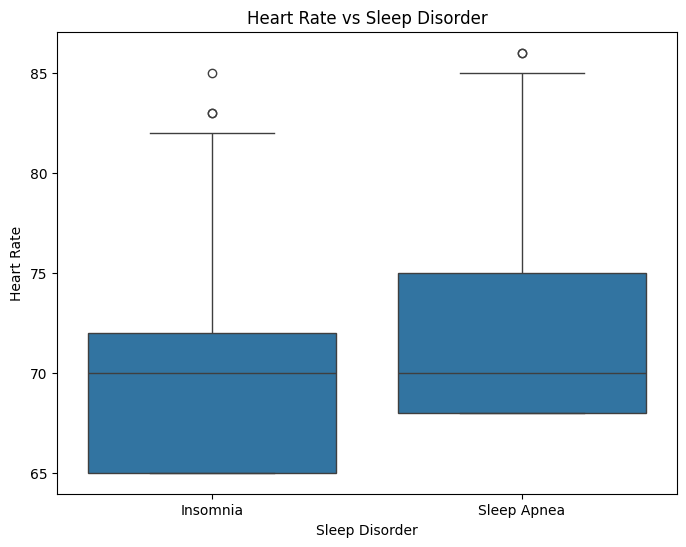

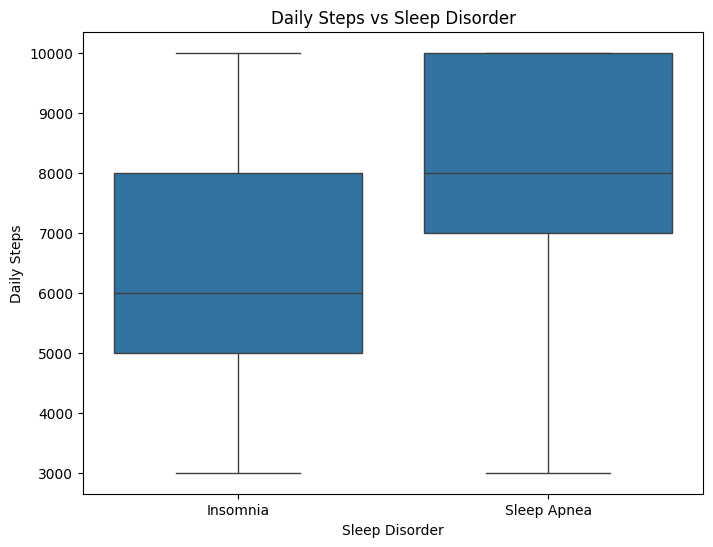

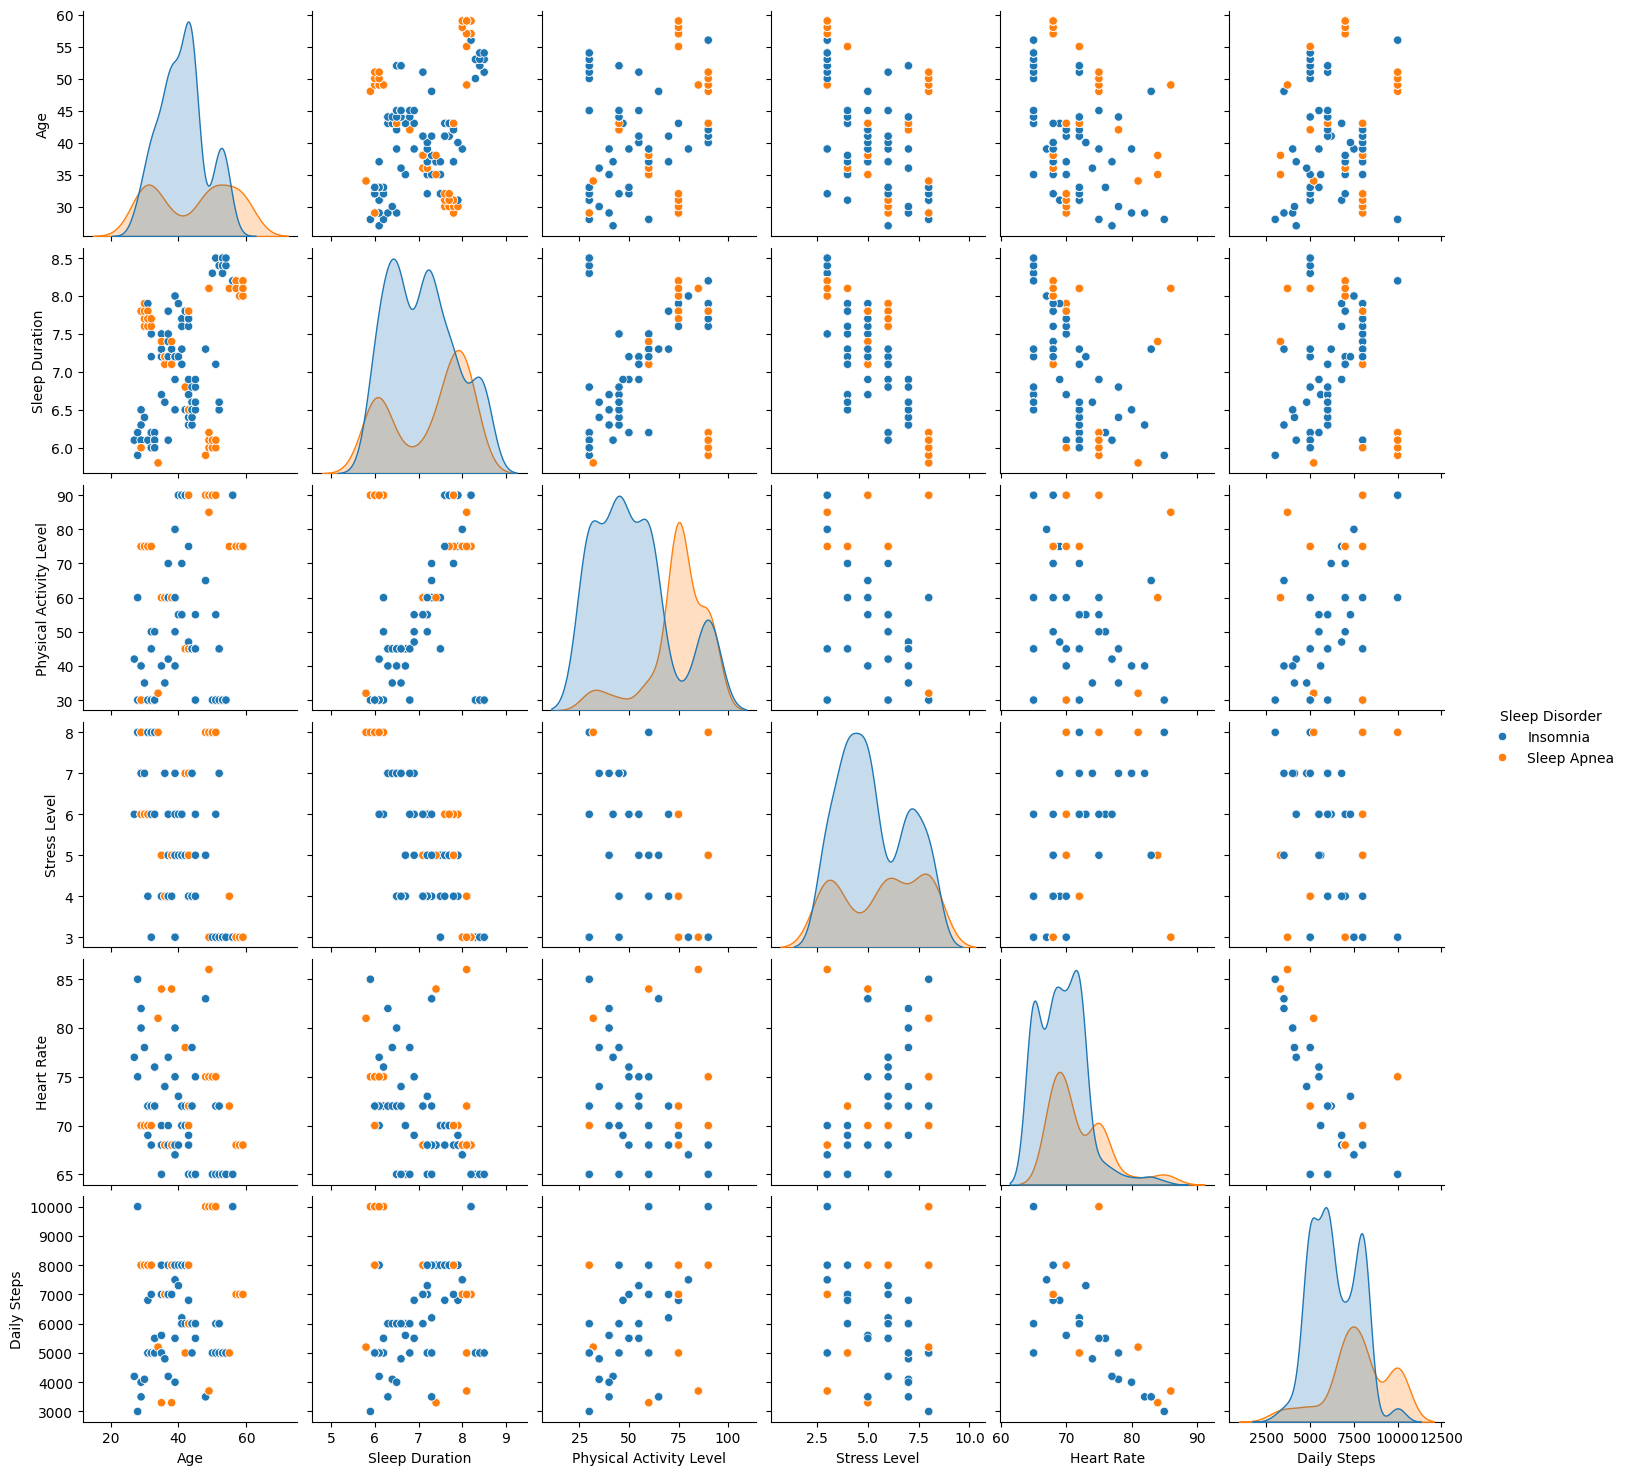

In [ ]:
# Visualize distribution of numerical features
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']  # Create a list of column names that represent numerical features in the dataset
df[numerical_features].hist(figsize=(12, 10))   # Create histograms for each numerical feature in the list, selecting only the 'numerical features' columns from the dataframe, and setting the overall figure size
plt.tight_layout()
plt.show()

# Visualize relationship between numerical features and 'Sleep Disorder' using box plots
for feature in numerical_features:    # Loop through every feature name in numerical features
    plt.figure(figsize=(8, 6))        # Create a new figure for each boxplot with specified size
    sns.boxplot(data=df, x='Sleep Disorder', y=feature)   # Create a boxplot to compare the distribution of the numerical feature across different categories of 'Sleep Disorder'
    plt.title(f'{feature} vs Sleep Disorder')
    plt.show()

# Visualize relationships between numerical features using a pairplot
sns.pairplot(df[numerical_features + ['Sleep Disorder']], hue='Sleep Disorder')
plt.show()

### 2.2. Impact of 'Gender', 'Age', and 'Occupation' on 'Sleep Disorders'

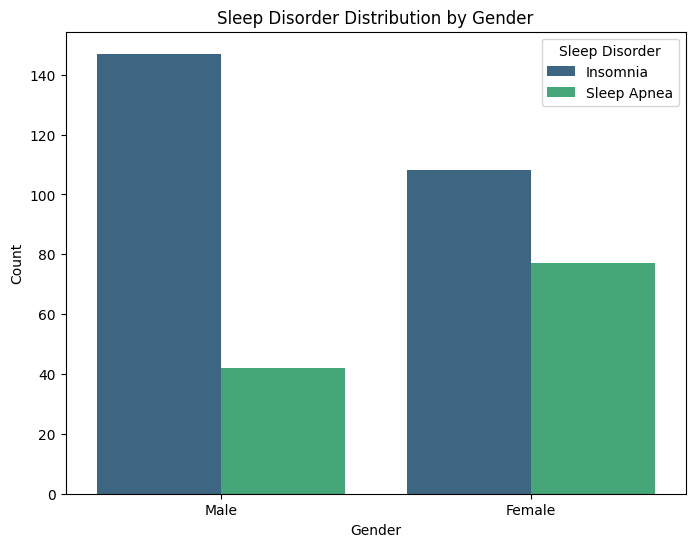

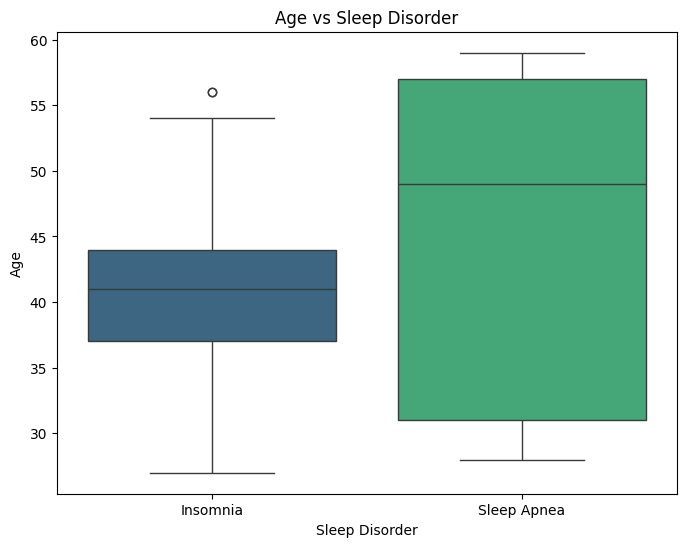

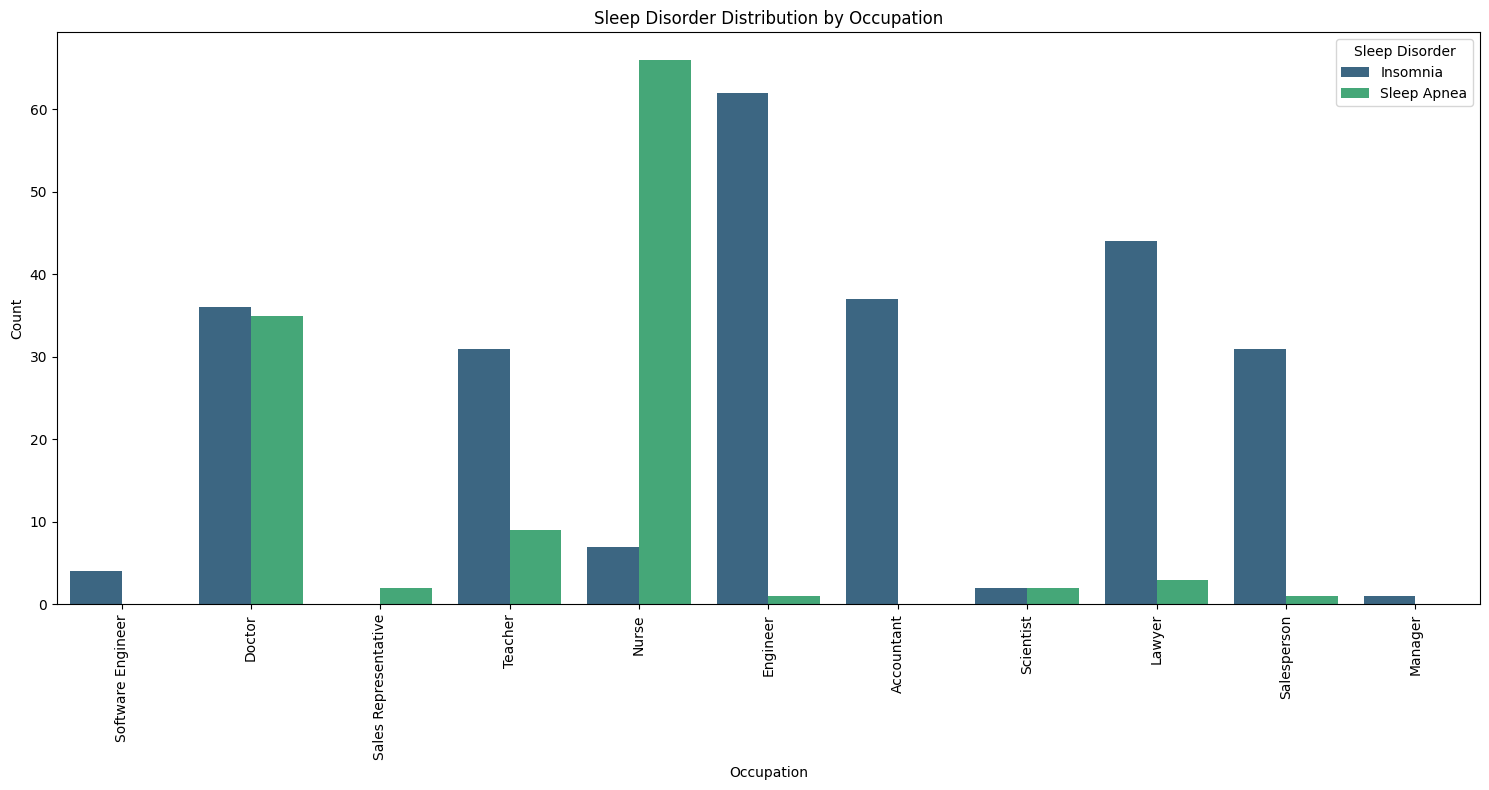

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize impact of 'Gender' on 'Sleep Disorder'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Sleep Disorder', palette='viridis')
plt.title('Sleep Disorder Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.show()

# Visualize impact of 'Age' on 'Sleep Disorder' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sleep Disorder', y='Age', palette='viridis')
plt.title('Age vs Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.show()

# Visualize impact of 'Occupation' on 'Sleep Disorder'
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder', palette='viridis')
plt.title('Sleep Disorder Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

### 2.3. Influence of BMI Category & Cardiovascular Health on Sleep Disorders

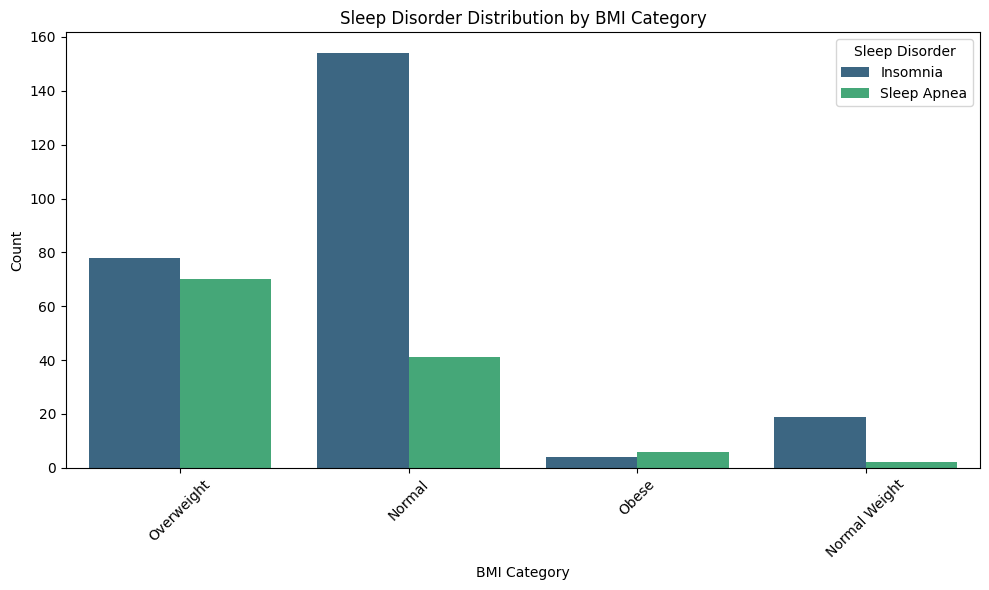

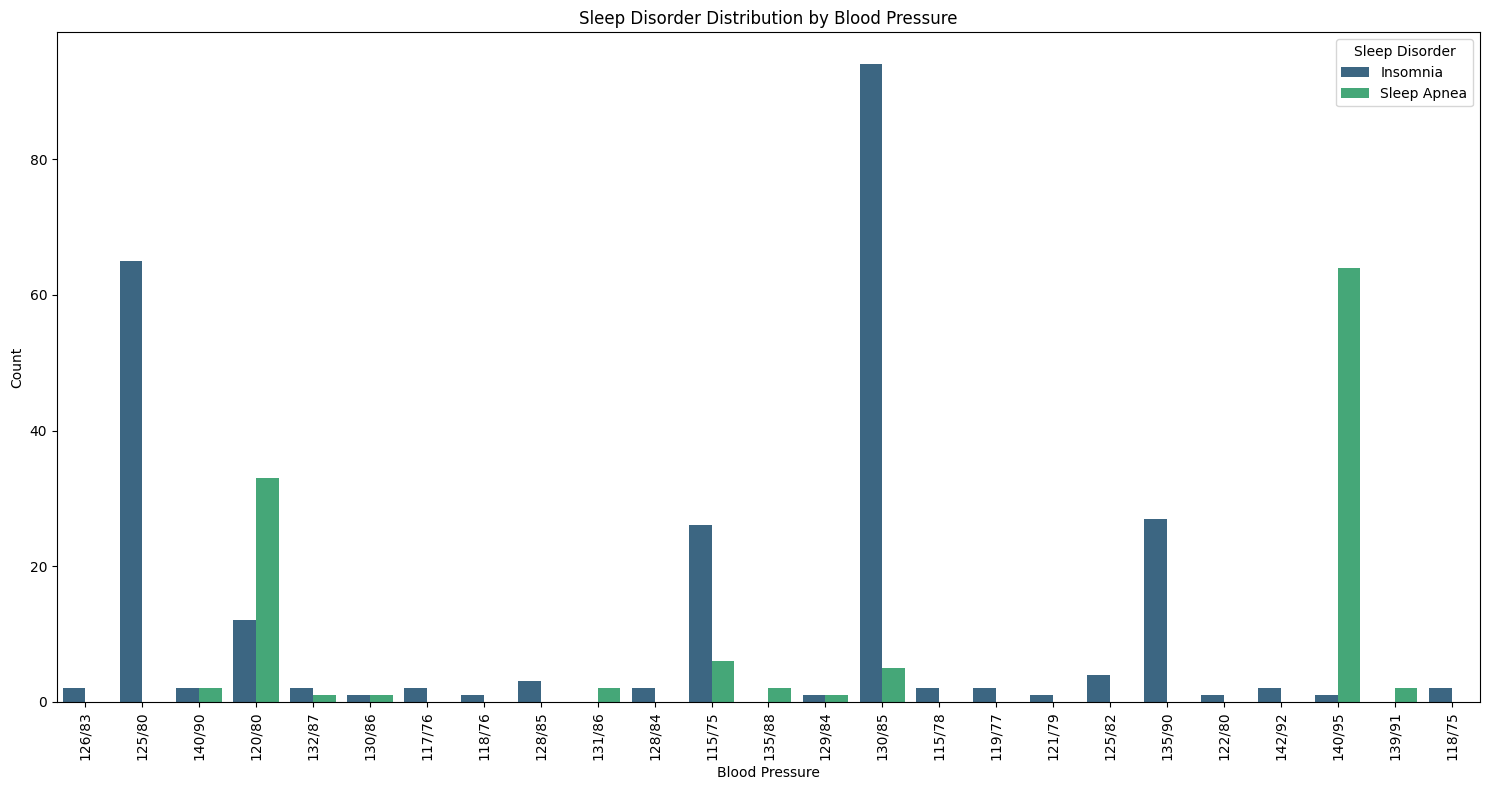

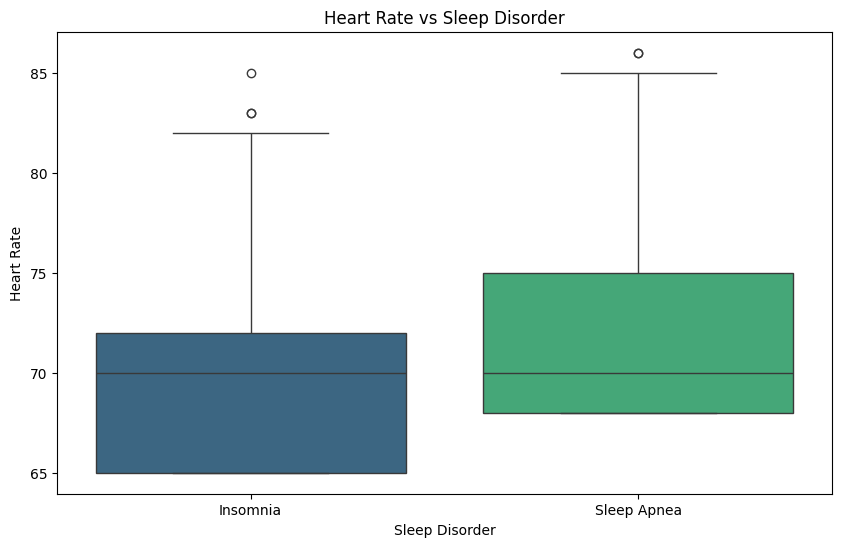

In [ ]:
# Visualize relationship between 'Sleep Disorder' and 'BMI Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='viridis')
plt.title('Sleep Disorder Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

# Visualize relationship between 'Sleep Disorder' and 'Blood Pressure'
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Blood Pressure', hue='Sleep Disorder', palette='viridis')
plt.title('Sleep Disorder Distribution by Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

# Visualize relationship between 'Sleep Disorder' and 'Heart Rate'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sleep Disorder', y='Heart Rate', palette='viridis')
plt.title('Heart Rate vs Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Heart Rate')
plt.show()

### 2.4. Outlier Detection

In [ ]:
# Check for outliers in numerical features using IQR
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Outliers in {feature}:")
    display(outliers)

Outliers in Age:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


Outliers in Sleep Duration:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


Outliers in Physical Activity Level:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


Outliers in Stress Level:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


Outliers in Heart Rate:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea
145,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea


Outliers in Daily Steps:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


### 2.5. Outlier Handling using Capping (Winsorizing)

In [ ]:
# Cap outliers in 'Heart Rate' using the upper bound
Q1_heart_rate = df['Heart Rate'].quantile(0.25)   # Calculate the first quartile— 25th percentile of the 'Heart Rate' column
Q3_heart_rate = df['Heart Rate'].quantile(0.75)   # Calculate the third quartile— 75th percentile of the 'Heart Rate' column
IQR_heart_rate = Q3_heart_rate - Q1_heart_rate    # Compute the IQR, difference between Q3 and Q1
upper_bound_heart_rate = Q3_heart_rate + 1.5 * IQR_heart_rate   # Define the upper bound for outliers using the 1.5 * IQR rule (any value above this threshold is considered an outlier)

# Cap the outliers— replace any 'Heart Rate' value greater than the upper bound
df['Heart Rate'] = df['Heart Rate'].apply(lambda x: upper_bound_heart_rate if x > upper_bound_heart_rate else x)

print("Outliers in Heart Rate after capping:")
display(df[(df['Heart Rate'] > upper_bound_heart_rate)])

Outliers in Heart Rate after capping:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


### 2.6. Correlation Heatmap

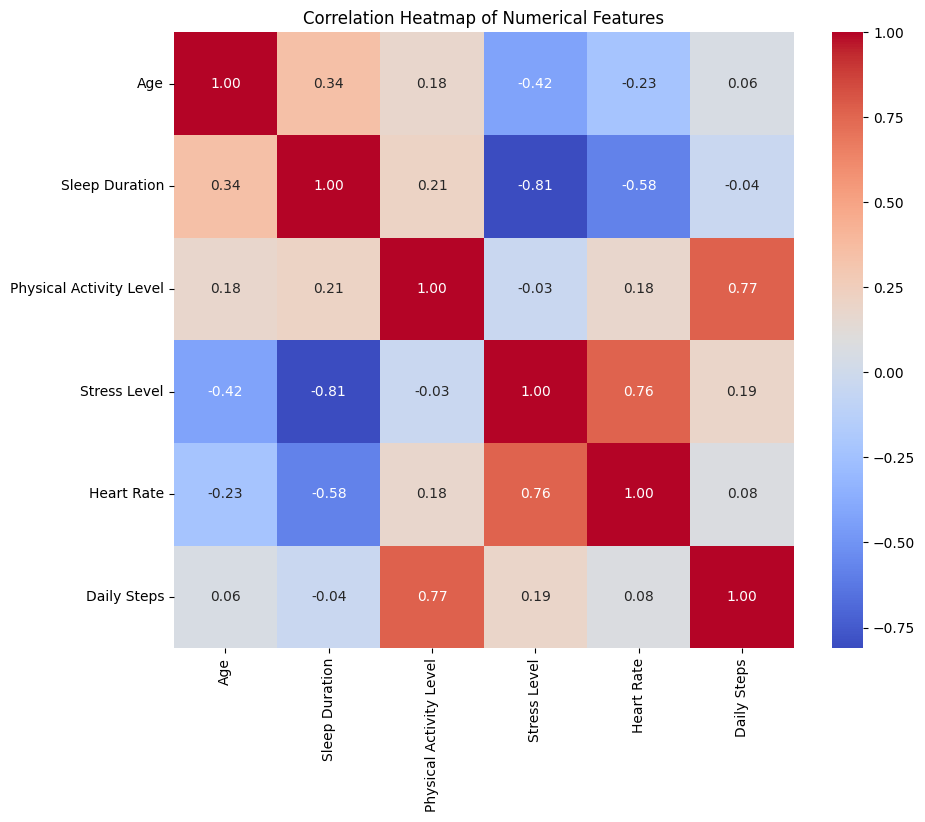

In [ ]:
# Calculate the correlation matrix for numerical features
numerical_features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 3. Handling Categorical Variables & Feature Engineering (Splitting 'Blood Pressure')

In [ ]:
# Handle categorical variables using one-hot encoding
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
# Convert categorical features into dummy variables using one-hot encoding
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split 'Blood Pressure' into systolic and diastolic pressure
df_processed[['Systolic Pressure', 'Diastolic Pressure']] = df_processed['Blood Pressure'].str.split('/', expand=True)

# Convert the new pressure columns to numeric
df_processed['Systolic Pressure'] = pd.to_numeric(df_processed['Systolic Pressure'])
df_processed['Diastolic Pressure'] = pd.to_numeric(df_processed['Diastolic Pressure'])

# Drop the original 'Blood Pressure' column
df_processed = df_processed.drop('Blood Pressure', axis=1)

print("DataFrame after handling categorical variables and splitting Blood Pressure:")
display(df_processed.head())

DataFrame after handling categorical variables and splitting Blood Pressure:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Systolic Pressure,Diastolic Pressure
0,1,27,6.1,6,42,6,77.0,4200,True,False,...,False,False,True,False,False,False,True,False,126,83
1,2,28,6.2,6,60,8,75.0,10000,True,True,...,False,False,False,False,False,False,False,False,125,80
2,3,28,6.2,6,60,8,75.0,10000,True,True,...,False,False,False,False,False,False,False,False,125,80
3,4,28,5.9,4,30,8,78.0,3000,True,False,...,False,False,False,False,False,True,False,True,140,90
4,5,28,5.9,4,30,8,78.0,3000,True,False,...,False,False,False,False,False,True,False,True,140,90


### 4. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features for scaling (excluding the new pressure columns and Person ID)
numerical_features_for_scaling = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
df_processed[numerical_features_for_scaling] = scaler.fit_transform(df_processed[numerical_features_for_scaling])

print("DataFrame after feature scaling:")
display(df_processed.head())

DataFrame after feature scaling:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Sleep Apnea,Systolic Pressure,Diastolic Pressure
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.974677,-1.619584,True,False,...,False,False,True,False,False,False,True,False,-0.330002,-0.268102
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.413271,1.970077,True,True,...,False,False,False,False,False,False,False,False,-0.459239,-0.755640
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.413271,1.970077,True,True,...,False,False,False,False,False,False,False,False,-0.459239,-0.755640
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,2.255380,-2.362273,True,False,...,False,False,False,False,False,True,False,True,1.479309,0.869486
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,2.255380,-2.362273,True,False,...,False,False,False,False,False,True,False,True,1.479309,0.869486


### 5. Checking for Class Imbalance

In [ ]:
# Check the distribution of the target variable 'Sleep Disorder'
sleep_disorder_counts = df_processed['Sleep Disorder_Sleep Apnea'].value_counts()

print("Distribution of Sleep Disorder:")
print(sleep_disorder_counts)

# Calculate the percentage of each class
sleep_disorder_percentages = df_processed['Sleep Disorder_Sleep Apnea'].value_counts(normalize=True) * 100

print("\nPercentage distribution of Sleep Disorder:")
print(sleep_disorder_percentages)

Distribution of Sleep Disorder:
Sleep Disorder_Sleep Apnea
False    255
True     119
Name: count, dtype: int64

Percentage distribution of Sleep Disorder:
Sleep Disorder_Sleep Apnea
False    68.181818
True     31.818182
Name: proportion, dtype: float64


### 6. Addressing Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_processed.drop('Sleep Disorder_Sleep Apnea', axis=1)
y = df_processed['Sleep Disorder_Sleep Apnea']

# Split the data into training (80%) and testing (20%) sets (optional, but good practice before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of training data before SMOTE:", X_train.shape)
print("Shape of training data after SMOTE:", X_train_resampled.shape)
print("\nDistribution of 'Sleep Disorder' in training data before SMOTE:")
print(y_train.value_counts())
print("\nDistribution of 'Sleep Disorder' in training data after SMOTE:")
print(y_train_resampled.value_counts())

Shape of training data before SMOTE: (299, 24)
Shape of training data after SMOTE: (408, 24)

Distribution of 'Sleep Disorder' in training data before SMOTE:
Sleep Disorder_Sleep Apnea
False    204
True      95
Name: count, dtype: int64

Distribution of 'Sleep Disorder' in training data after SMOTE:
Sleep Disorder_Sleep Apnea
False    204
True     204
Name: count, dtype: int64


### 7. Model Selection and Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
log_reg = LogisticRegression(random_state=42)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42) # probability=True for ROC AUC
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the models on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)
naive_bayes.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)
decision_tree.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
random_forest.fit(X_train_resampled, y_train_resampled)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
gradient_boosting.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

### 8. Model Evaluation

In [ ]:
# Create a dictionary to store the models
models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": naive_bayes,
    "K-Nearest Neighbors": knn,
    "Decision Tree": decision_tree,
    "Support Vector Machine": svm,
    "Random Forest": random_forest,
    "XGBoost": xgb_classifier,
    "Gradient Boosting": gradient_boosting
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) # Use predict_proba for ROC AUC

    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }

# Print the evaluation results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}-")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Evaluation Results:

Logistic Regression-
  Accuracy: 0.8533
  Precision: 0.7826
  Recall: 0.7500
  F1-Score: 0.7660
  ROC AUC: 0.8954

Naive Bayes-
  Accuracy: 0.7600
  Precision: 0.5882
  Recall: 0.8333
  F1-Score: 0.6897
  ROC AUC: 0.8505

K-Nearest Neighbors-
  Accuracy: 0.8133
  Precision: 0.7083
  Recall: 0.7083
  F1-Score: 0.7083
  ROC AUC: 0.9032

Decision Tree-
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.8873

Support Vector Machine-
  Accuracy: 0.7600
  Precision: 0.6071
  Recall: 0.7083
  F1-Score: 0.6538
  ROC AUC: 0.8211

Random Forest-
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.9551

XGBoost-
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.9367

Gradient Boosting-
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.8607


Model comparison based on F1-Score

In [ ]:
# Compare models based on F1-score
best_model_name_f1 = ""
best_f1_score = 0

for name, metrics in results.items():
    if metrics['F1-Score'] > best_f1_score:
        best_f1_score = metrics['F1-Score']
        best_model_name_f1 = name

print(f"Best performing model based on F1-score: {best_model_name_f1}")
print(f"F1-score: {best_f1_score:.4f}")

print("\nMetrics for the best performing model (F1-score):")
for metric, value in results[best_model_name_f1].items():
    print(f"  {metric}: {value:.4f}")

# Compare models based on ROC AUC
best_model_name_roc_auc = ""
best_roc_auc_score = 0

for name, metrics in results.items():
    if metrics['ROC AUC'] > best_roc_auc_score:
        best_roc_auc_score = metrics['ROC AUC']
        best_model_name_roc_auc = name

print(f"\nBest performing model based on ROC AUC: {best_model_name_roc_auc}")
print(f"ROC AUC: {best_roc_auc_score:.4f}")

print("\nMetrics for the best performing model (ROC AUC):")
for metric, value in results[best_model_name_roc_auc].items():
    print(f"  {metric}: {value:.4f}")

Best performing model based on F1-score: Decision Tree
F1-score: 0.8511

Metrics for the best performing model (F1-score):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.8873

Best performing model based on ROC AUC: Random Forest
ROC AUC: 0.9551

Metrics for the best performing model (ROC AUC):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.9551


### 7. Feature Importance

Top 13 Most Important Features:
Physical Activity Level    0.156596
Person ID                  0.142743
Age                        0.095770
Diastolic Pressure         0.095123
Systolic Pressure          0.088921
Occupation_Nurse           0.078505
Daily Steps                0.062307
Sleep Duration             0.048124
Quality of Sleep           0.043194
Heart Rate                 0.038956
Stress Level               0.038217
Occupation_Doctor          0.032319
Occupation_Teacher         0.030204
dtype: float64


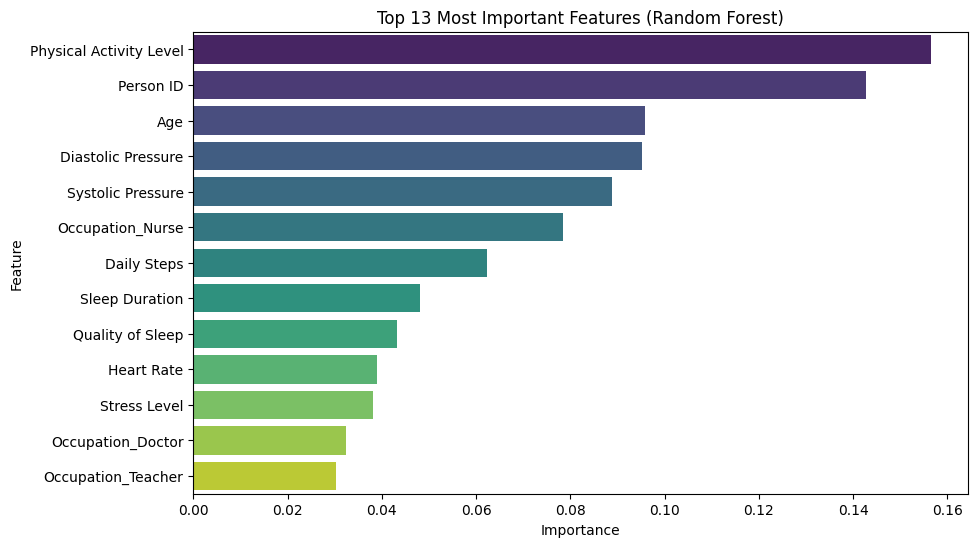

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Create a pandas Series for easier handling and sorting
feature_importance_series = pd.Series(feature_importances, index=X_train_resampled.columns)

# Sort the features by importance and get the top 13
top_13_features = feature_importance_series.sort_values(ascending=False).head(13)

print("Top 13 Most Important Features:")
print(top_13_features)

# Visualize the top 13 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_13_features.values, y=top_13_features.index, palette='viridis')
plt.title('Top 13 Most Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Extract the names of the top 13 features and create new training and testing datasets with only these features.



In [ ]:
# Extract the names of the top 13 features
selected_features = top_13_features.index.tolist()

# Create new training and testing DataFrames with only the top 13 features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Display the shapes of the new datasets
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Shape of X_train_selected: (408, 13)
Shape of X_test_selected: (75, 13)


Retrain models.


In [ ]:
# Initialize the models
log_reg_selected = LogisticRegression(random_state=42)
naive_bayes_selected = GaussianNB()
knn_selected = KNeighborsClassifier()
decision_tree_selected = DecisionTreeClassifier(random_state=42)
svm_selected = SVC(probability=True, random_state=42) # probability=True for ROC AUC
random_forest_selected = RandomForestClassifier(random_state=42)
xgb_classifier_selected = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
gradient_boosting_selected = GradientBoostingClassifier(random_state=42)

# Train the models on the resampled training data with selected features
log_reg_selected.fit(X_train_selected, y_train_resampled)
naive_bayes_selected.fit(X_train_selected, y_train_resampled)
knn_selected.fit(X_train_selected, y_train_resampled)
decision_tree_selected.fit(X_train_selected, y_train_resampled)
svm_selected.fit(X_train_selected, y_train_resampled)
random_forest_selected.fit(X_train_selected, y_train_resampled)
xgb_classifier_selected.fit(X_train_selected, y_train_resampled)
gradient_boosting_selected.fit(X_train_selected, y_train_resampled)

# Store the trained models in a dictionary
models_selected = {
    "Logistic Regression (Selected Features)": log_reg_selected,
    "Naive Bayes (Selected Features)": naive_bayes_selected,
    "K-Nearest Neighbors (Selected Features)": knn_selected,
    "Decision Tree (Selected Features)": decision_tree_selected,
    "Support Vector Machine (Selected Features)": svm_selected,
    "Random Forest (Selected Features)": random_forest_selected,
    "XGBoost (Selected Features)": xgb_classifier_selected,
    "Gradient Boosting (Selected Features)": gradient_boosting_selected
}

Evaluate the performance of each retrained model on the test data with selected features using the classification metrics and print the results.

In [ ]:
# Evaluate each model with selected features
results_selected = {}
for name, model in models_selected.items():
    # Make predictions on the test data with selected features
    y_pred_selected = model.predict(X_test_selected)

    # Calculate evaluation metrics
    accuracy_selected = accuracy_score(y_test, y_pred_selected)
    precision_selected = precision_score(y_test, y_pred_selected)
    recall_selected = recall_score(y_test, y_pred_selected)
    f1_selected = f1_score(y_test, y_pred_selected)
    roc_auc_selected = roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1]) # Use predict_proba for ROC AUC

    # Store the results
    results_selected[name] = {
        "Accuracy": accuracy_selected,
        "Precision": precision_selected,
        "Recall": recall_selected,
        "F1-Score": f1_selected,
        "ROC AUC": roc_auc_selected
    }

# Print the evaluation results
print("Model Evaluation Results with Selected Features:")
for name, metrics in results_selected.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Evaluation Results with Selected Features:

Logistic Regression (Selected Features):
  Accuracy: 0.8667
  Precision: 0.7917
  Recall: 0.7917
  F1-Score: 0.7917
  ROC AUC: 0.8717

Naive Bayes (Selected Features):
  Accuracy: 0.8533
  Precision: 0.8095
  Recall: 0.7083
  F1-Score: 0.7556
  ROC AUC: 0.8391

K-Nearest Neighbors (Selected Features):
  Accuracy: 0.8133
  Precision: 0.7083
  Recall: 0.7083
  F1-Score: 0.7083
  ROC AUC: 0.8983

Decision Tree (Selected Features):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.8873

Support Vector Machine (Selected Features):
  Accuracy: 0.7600
  Precision: 0.6071
  Recall: 0.7083
  F1-Score: 0.6538
  ROC AUC: 0.8194

Random Forest (Selected Features):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.9575

XGBoost (Selected Features):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.9440

Gradient Boosting (Selected Featur

Compare the evaluation results of models trained with all features and those trained with selected features by iterating through the models and printing their metrics side-by-side.



In [ ]:
# Compare the performance of the models
comparison_results = {}   # Initialize an empty dictionary to store comparison results between all and selected features

# Loop through each model name and its metrics from the results of all features
for name, metrics_all in results.items():
    name_selected = name + " (Selected Features)"   # Create a matching model name key for the selected features results

    # If the same model exists in the selected features results, compare both sets
    if name_selected in results_selected:
        metrics_selected = results_selected[name_selected]

        # Store both results under the same model name
        comparison_results[name] = {
            "All Features": metrics_all,
            "Selected Features": metrics_selected
        }

# Print the comparison results
print("Model Performance Comparison (All Features vs. Selected Features):")
for name, comparison in comparison_results.items():
    print(f"\n{name}:")
    print("  Metrics with All Features:")
    for metric, value in comparison["All Features"].items():
        print(f"    {metric}: {value:.4f}")
    print("  Metrics with Selected Features:")
    for metric, value in comparison["Selected Features"].items():
        print(f"    {metric}: {value:.4f}")

Model Performance Comparison (All Features vs. Selected Features):

Logistic Regression:
  Metrics with All Features:
    Accuracy: 0.8533
    Precision: 0.7826
    Recall: 0.7500
    F1-Score: 0.7660
    ROC AUC: 0.8954
  Metrics with Selected Features:
    Accuracy: 0.8667
    Precision: 0.7917
    Recall: 0.7917
    F1-Score: 0.7917
    ROC AUC: 0.8717

Naive Bayes:
  Metrics with All Features:
    Accuracy: 0.7600
    Precision: 0.5882
    Recall: 0.8333
    F1-Score: 0.6897
    ROC AUC: 0.8505
  Metrics with Selected Features:
    Accuracy: 0.8533
    Precision: 0.8095
    Recall: 0.7083
    F1-Score: 0.7556
    ROC AUC: 0.8391

K-Nearest Neighbors:
  Metrics with All Features:
    Accuracy: 0.8133
    Precision: 0.7083
    Recall: 0.7083
    F1-Score: 0.7083
    ROC AUC: 0.9032
  Metrics with Selected Features:
    Accuracy: 0.8133
    Precision: 0.7083
    Recall: 0.7083
    F1-Score: 0.7083
    ROC AUC: 0.8983

Decision Tree:
  Metrics with All Features:
    Accuracy: 0.9067
  

### 8. Select Best Model with Selected Features

In [ ]:
# Compare models based on F1-score with selected features
best_model_name_f1_selected = ""
best_f1_score_selected = 0

for name, metrics in results_selected.items():
    if metrics['F1-Score'] > best_f1_score_selected:
        best_f1_score_selected = metrics['F1-Score']
        best_model_name_f1_selected = name

print(f"Best performing model based on F1-score (Selected Features): {best_model_name_f1_selected}")
print(f"F1-score (Selected Features): {best_f1_score_selected:.4f}")

print("\nMetrics for the best performing model (F1-score, Selected Features):")
for metric, value in results_selected[best_model_name_f1_selected].items():
    print(f"  {metric}: {value:.4f}")

# Compare models based on ROC AUC with selected features
best_model_name_roc_auc_selected = ""
best_roc_auc_score_selected = 0

for name, metrics in results_selected.items():
    if metrics['ROC AUC'] > best_roc_auc_score_selected:
        best_roc_auc_score_selected = metrics['ROC AUC']
        best_model_name_roc_auc_selected = name

print(f"\nBest performing model based on ROC AUC (Selected Features): {best_model_name_roc_auc_selected}")
print(f"ROC AUC (Selected Features): {best_roc_auc_score_selected:.4f}")

print("\nMetrics for the best performing model (ROC AUC, Selected Features):")
for metric, value in results_selected[best_model_name_roc_auc_selected].items():
    print(f"  {metric}: {value:.4f}")

Best performing model based on F1-score (Selected Features): Decision Tree (Selected Features)
F1-score (Selected Features): 0.8511

Metrics for the best performing model (F1-score, Selected Features):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.8873

Best performing model based on ROC AUC (Selected Features): Random Forest (Selected Features)
ROC AUC (Selected Features): 0.9575

Metrics for the best performing model (ROC AUC, Selected Features):
  Accuracy: 0.9067
  Precision: 0.8696
  Recall: 0.8333
  F1-Score: 0.8511
  ROC AUC: 0.9575


Performed hyperparameter optmization techniques like GridSearch CV, RandomisedSearch CV, and Bayes Search (Bayesian Optimisation).

The results lead to a slightly decreased F1-Score and ROC-AUC (0.8000 and 0.9534 using Bayesian Optimisation), even with a wide parameter range. Hence, we decided to drop hyperparameter tuning and stick with the best model (Random Forest) with selected features for further steps.


### 9. Visualize Best Model Performance (Selected Features)

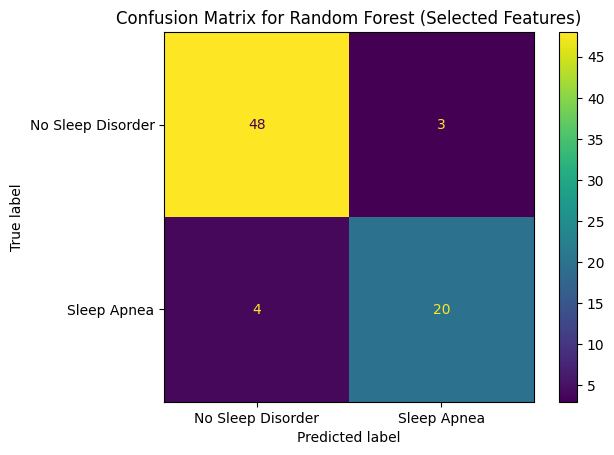

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best performing model based on ROC AUC with selected features (Random Forest)
best_model_selected = models_selected["Random Forest (Selected Features)"]

# Make predictions on the test data with selected features
y_pred_best_selected = best_model_selected.predict(X_test_selected)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_selected)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Sleep Disorder', 'Sleep Apnea'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for Random Forest (Selected Features)')
plt.show()

### 10. Evaluate Final Model Performance

In [ ]:
# Identify the best performing model (Random Forest with selected features)
best_model_final = models_selected["Random Forest (Selected Features)"]

# Train the best model on the entire processed dataset with selected features
X_final = df_processed[selected_features]
y_final = df_processed['Sleep Disorder_Sleep Apnea']

best_model_final.fit(X_final, y_final)

RandomForestClassifier(random_state=42)

Performance metrics of the final model on the entire dataset:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC AUC: 1.0000


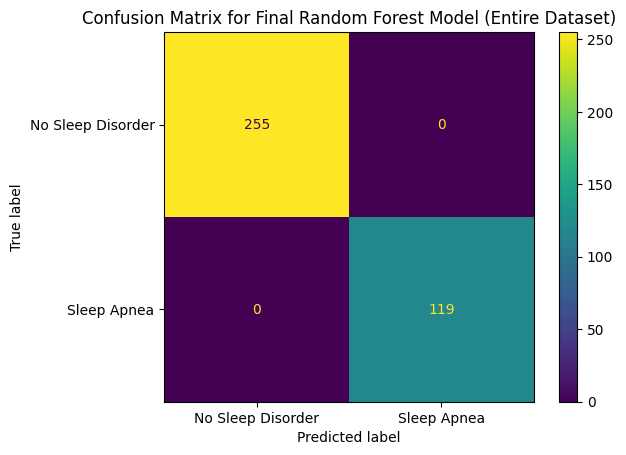

In [ ]:
# Evaluate the final model on the entire dataset (this will show performance on the training data)
y_pred_final = best_model_final.predict(X_final)

accuracy_final = accuracy_score(y_final, y_pred_final)
precision_final = precision_score(y_final, y_pred_final)
recall_final = recall_score(y_final, y_pred_final)
f1_final = f1_score(y_final, y_pred_final)
roc_auc_final = roc_auc_score(y_final, best_model_final.predict_proba(X_final)[:, 1])

print("Performance metrics of the final model on the entire dataset:")
print(f"  Accuracy: {accuracy_final:.4f}")
print(f"  Precision: {precision_final:.4f}")
print(f"  Recall: {recall_final:.4f}")
print(f"  F1-Score: {f1_final:.4f}")
print(f"  ROC AUC: {roc_auc_final:.4f}")

# Display the confusion matrix for the final model
cm_final = confusion_matrix(y_final, y_pred_final)
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=['No Sleep Disorder', 'Sleep Apnea'])
disp_final.plot(cmap='viridis')
plt.title('Confusion Matrix for Final Random Forest Model (Entire Dataset)')
plt.show()

### 11. Model Deployment (Done for personal reference, do not run)

In [ ]:
import joblib
import pickle
import json

# Save the trained Random Forest model
joblib.dump(best_model_final, 'random_forest_model.pkl')

# Save the list of selected features
with open('selected_features.json', 'w') as f:
    json.dump(selected_features, f)

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')

print("All necessary deployment files saved:\n1. random_forest_model.pkl\n2. selected_features.json\n3. scaler.pkl")

# Load your existing joblib model using joblib.load
model = joblib.load("random_forest_model.pkl")

print("Model re-saved successfully as model.joblib")

All necessary deployment files saved:
1. random_forest_model.pkl
2. selected_features.json
3. scaler.pkl
Model re-saved successfully as model.joblib


In [ ]:
from sklearn.pipeline import make_pipeline

# load model and scaler
model = joblib.load("random_forest_model.pkl")

# if scaler was saved with joblib
scaler = joblib.load("scaler.pkl")

pipeline = make_pipeline(scaler, model)
joblib.dump(pipeline, "model_pipeline.joblib")
print("Saved model_pipeline.joblib")

Saved model_pipeline.joblib


In [ ]:
pipe = joblib.load("model_pipeline.joblib")
print("Pipeline steps:", [name for name, _ in pipe.steps])

if hasattr(pipe, "feature_names_in_"):
    print("\nPipeline feature_names_in_:\n\n", pipe.feature_names_in_)

model = pipe[-1]
print("\nModel type:", type(model))

if hasattr(model, "n_features_in_"):
    print("\nModel expects:", model.n_features_in_, "features")

if hasattr(model, "feature_names_in_"):
    print("\nModel feature_names_in_:\n \n", model.feature_names_in_)


Pipeline steps: ['standardscaler', 'randomforestclassifier']

Pipeline feature_names_in_:

 ['Age' 'Sleep Duration' 'Quality of Sleep' 'Physical Activity Level'
 'Stress Level' 'Heart Rate' 'Daily Steps' 'Systolic Pressure'
 'Diastolic Pressure']

Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Model expects: 13 features

Model feature_names_in_:
 
 ['Physical Activity Level' 'Person ID' 'Age' 'Diastolic Pressure'
 'Systolic Pressure' 'Occupation_Nurse' 'Daily Steps' 'Sleep Duration'
 'Quality of Sleep' 'Heart Rate' 'Stress Level' 'Occupation_Doctor'
 'Occupation_Teacher']


### 12. Prepare Data for Model Performance Dashboard using Tableau (Done for personal reference, do not run)

In [ ]:
# Create an empty list to store the data
model_evaluation_data = []

# Iterate through the results_selected dictionary
for model_name, metrics in results_selected.items():
    row_data = {
        'Model Name': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    model_evaluation_data.append(row_data)

# Convert the list of dictionaries into a Pandas DataFrame
model_evaluation_df = pd.DataFrame(model_evaluation_data)

# Display the first few rows of the created DataFrame
print("Model Evaluation DataFrame:")
display(model_evaluation_df.head())

Model Evaluation DataFrame:


,Model Name,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression (Selected Features),0.866667,0.791667,0.791667,0.791667,0.871732
1,Naive Bayes (Selected Features),0.853333,0.809524,0.708333,0.755556,0.839052
2,K-Nearest Neighbors (Selected Features),0.813333,0.708333,0.708333,0.708333,0.898284
3,Decision Tree (Selected Features),0.906667,0.869565,0.833333,0.851064,0.887255
4,Support Vector Machine (Selected Features),0.760000,0.607143,0.708333,0.653846,0.819444


In [ ]:
# Export data to CSV file
csv_file_path = 'model_evaluation_results.csv'
model_evaluation_df.to_csv(csv_file_path, index=False)

print(f"DataFrame successfully exported to '{csv_file_path}'")

DataFrame successfully exported to 'model_evaluation_results.csv'
